In [0]:
import azure.ai.vision as sdk

In [0]:
endpoint = "https://computervisionlgpr.cognitiveservices.azure.com/"
key = "02d1b266c283499da549184a3c695d1a"

In [0]:
credencialesDeAcceso = sdk.VisionServiceOptions(endpoint, key)

In [0]:
#Instanciamos una configuracion
configuration = sdk.ImageAnalysisOptions()

In [0]:
configuration.features = (
  sdk.ImageAnalysisFeature.CAPTION |
  sdk.ImageAnalysisFeature.TEXT
)

In [0]:
#Variable deprecada
configuration.language = "en"

In [0]:
%fs cp dbfs:///mnt/azure/data/IMAGEN_1.jpg file:///tmp

res0: Boolean = true

In [0]:
%fs ls file:///tmp/IMAGEN_1.jpg

path,name,size,modificationTime
file:/tmp/IMAGEN_1.jpg,IMAGEN_1.jpg,161943,1712097398209


In [0]:
from PIL import Image

In [0]:
import IPython.display as visual

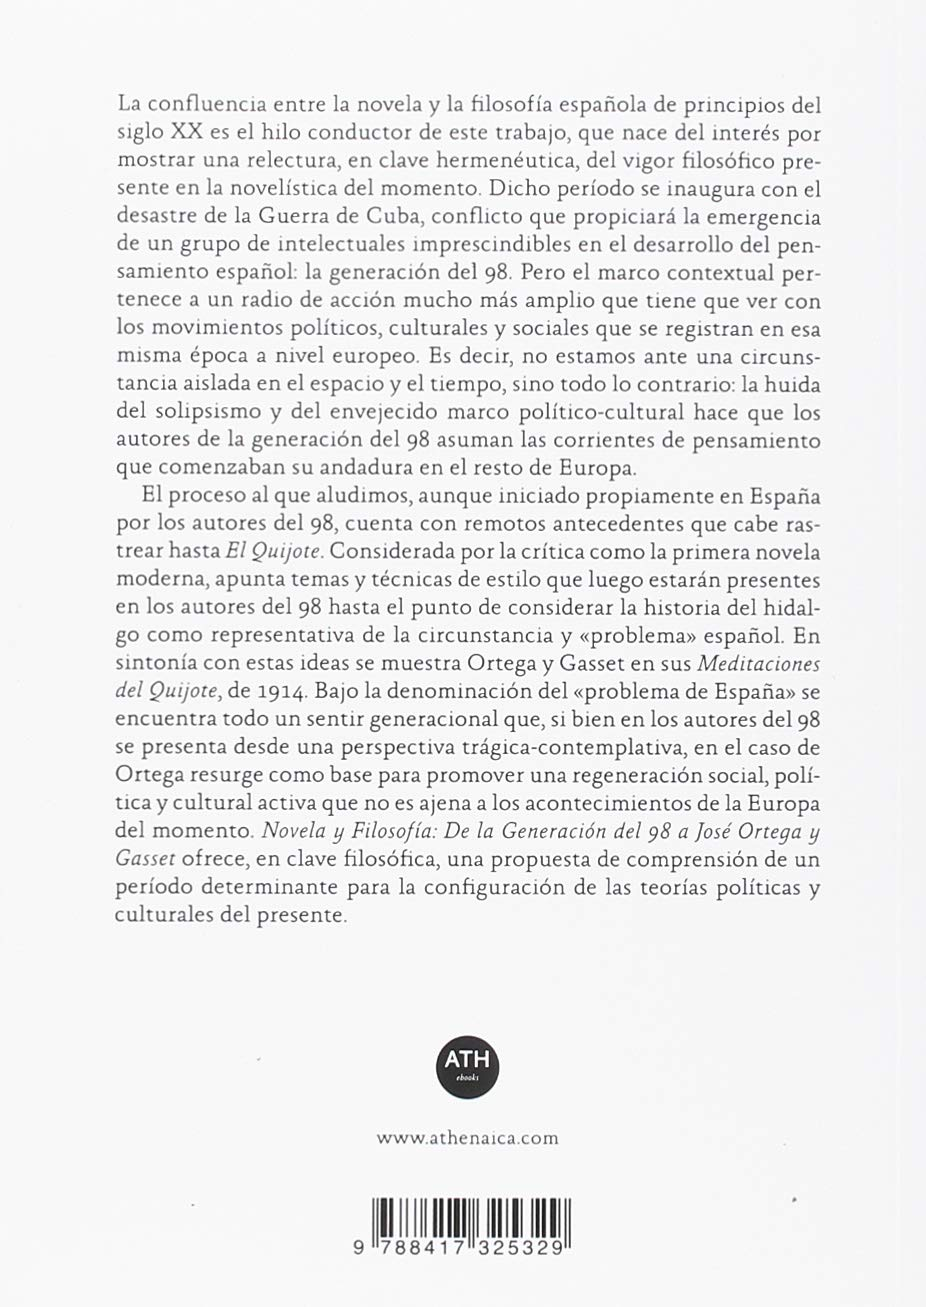

In [0]:
visual.display(Image.open("/tmp/IMAGEN_1.jpg"))

In [0]:
archivo = sdk.VisionSource(
  filename = "/tmp/IMAGEN_1.jpg"
)

In [0]:
servicio = sdk.ImageAnalyzer(credencialesDeAcceso, archivo, configuration)

In [0]:
resultado = servicio.analyze()

In [0]:
descripcion = resultado.caption.content
print(descripcion)

a white page with text


In [0]:
contenido = ""

In [0]:
for linea in resultado.text.lines:
  contenido = contenido + linea.content + "\n"
print(contenido)

La confluencia entre la novela y la filosofía española de principios del
siglo XX es el hilo conductor de este trabajo, que nace del interés por
mostrar una relectura, en clave hermenéutica, del vigor filosófico pre-
sente en la novelística del momento. Dicho período se inaugura con el
desastre de la Guerra de Cuba, conflicto que propiciará la emergencia
de un grupo de intelectuales imprescindibles en el desarrollo del pen-
samiento español: la generación del 98. Pero el marco contextual per-
tenece a un radio de acción mucho más amplio que tiene que ver con
los movimientos políticos, culturales y sociales que se registran en esa
misma época a nivel europeo. Es decir, no estamos ante una circuns-
tancia aislada en el espacio y el tiempo, sino todo lo contrario: la huida
del solipsismo y del envejecido marco político-cultural hace que los
autores de la generación del 98 asuman las corrientes de pensamiento
que comenzaban su andadura en el resto de Europa.
El proceso al que aludimos, aun

In [0]:
with open("/tmp/resultado_ocr.txt","w") as archivoDeTexto:
  archivoDeTexto.write(contenido)


In [0]:
%fs cp file:///tmp/resultado_ocr.txt dbfs:///mnt/azure

res3: Boolean = true